# Kmeans clustering
Nel seguente notebook effettuiamo il clustering dei dati ottenuti. Si effettua prima uno scaling dei dati, poi un analisi del numero ottimale dei cluster e infine si effettua il clustering effettivo. Con il kmeans classico non si includono gli atributi categorici, perchè la funzione di distanza è predefinita e non personalizzabile


In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("dataset/_temp_CS-dataset.csv",sep='\t')
df.head()


,CustomerID,I,Iu,Imax,E
0,17850.0,1693,24,12.0,4.380532
1,13047.0,1355,106,32.0,6.481921
2,12583.0,5009,115,360.0,6.445631
3,13748.0,439,24,80.0,4.494680
4,15100.0,58,1,32.0,0.000000


## Transformation

In [31]:
#Eliminiamo il client id null per adesso poi non ci sarà
df=df[df["CustomerID"].notnull()]
del df['CustomerID']
df.head()

,I,Iu,Imax,E
0,1693,24,12.0,4.380532
1,1355,106,32.0,6.481921
2,5009,115,360.0,6.445631
3,439,24,80.0,4.494680
4,58,1,32.0,0.000000


In [32]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#StandardScaler corrisponde allo z scaler
scaler = MinMaxScaler()
X = scaler.fit_transform(df.values)
print(X[:5])

[[0.01013085 0.01282766 0.00192263 0.42281532]
 [0.0084153  0.05856107 0.00216912 0.62564451]
 [0.02696146 0.06358059 0.00621156 0.6221417 ]
 [0.00376608 0.01282766 0.00276069 0.43383311]
 [0.00183228 0.         0.00216912 0.        ]]


## K-means
Con il kmenas classico stiamo utiizzando l'algoritmo kmeans++ che inizializza i centroidi in modo tale che siano distanti l'uno dall'altro, non in maniera random

In [33]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [34]:
kmeans = KMeans(n_clusters=3, n_init=10, max_iter=10)
kmeans.fit(X)

KMeans(max_iter=10, n_clusters=3)

Ora possiamo vedere a quale cluster è stato assegnato ogni sample e anche i centroidi

In [45]:
print(kmeans.cluster_centers_)
print(kmeans.labels_[:5])

[[0.01332086 0.07659311 0.00284472 0.64916673]
 [0.00471155 0.01691202 0.00261815 0.4592516 ]
 [0.00330593 0.00289045 0.00557788 0.21899587]]
[1 0 0 1 2]


Plottiamo quati sample ci sono in ogni cluster

[1428 2106  838]


<BarContainer object of 3 artists>

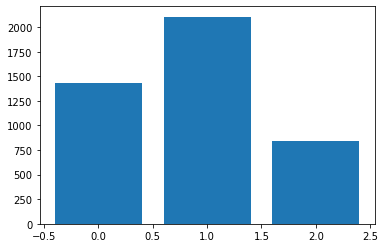

In [44]:
labels, counts = np.unique(kmeans.labels_, return_counts=True)
print(counts)
plt.bar(labels, counts, align='center')

Vediamo ora una visualizzazione 2d dei cluster assegnati. Questo è solo un esempio bisogna trovare qualcosa di significativo

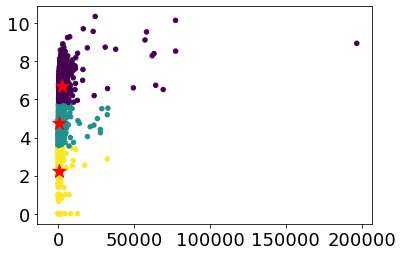

In [49]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(df['I'], df['E'], c=kmeans.labels_, 
            s=20)
plt.scatter(centers[:, 0], centers[:, 3], s=200, marker='*', c='r')
plt.tick_params(axis='both', which='major', labelsize=18)
plt.show()

Visualizzazione Parallel coordinates

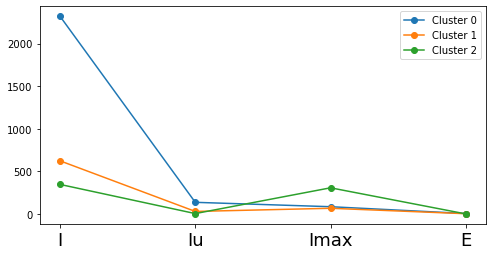

In [50]:
plt.figure(figsize=(8, 4))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xticks(range(0, len(df.columns)), df.columns, fontsize=18)
plt.legend(fontsize=10)
plt.show()

Spider plot

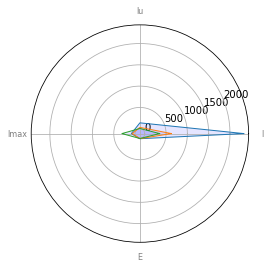

In [51]:
from math import pi
 
# number of variable
N = len(df.columns)
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
for i in range(0, len(centers)):
    angles = [n / float(N) * 2 * pi for n in range(N)]
    values = centers[i].tolist()
    values += values[:1]
    angles += angles[:1]
# Initialise the spider plot
    ax = plt.subplot(polar=True)
# Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], df.columns, color='grey', size=8) 
# Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')
 # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)

Metriche per la valutazione interne, senza altre fonti esterne

In [52]:
from sklearn import metrics
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(X, kmeans.labels_))
print('Separation %s' % metrics.davies_bouldin_score(X, kmeans.labels_))

SSE 33.629767061457684
Silhouette 0.5162699782907628
Separation 0.603832538812188


Da fare: Aggiungere categorie eliminate e valutazione

## Knee method

In [53]:
sse_list = list()
max_k = 40
for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(X)
    
    sse = kmeans.inertia_
    sse_list.append(sse)

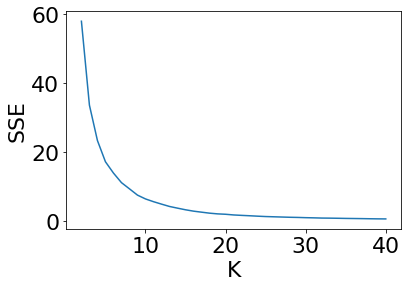

In [54]:
plt.plot(range(2, len(sse_list) + 2), sse_list)
plt.ylabel('SSE', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()